In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import scipy
from tabulate import tabulate

df = pd.read_csv('University.csv')

# Regional University Salary Data Capstone

This dataset, exported from Kaggle, shows median starting and mid-career salary data for 320 United States universities. The timeframe is not specified but the data seems current after conducting some cursory internet searches. For simplicity throughout the capstone, starting median salaries and mid-career median salaries will be expressed as starting and mid-career salaries.

While the data itself is somewhat simple, the data can be used in a wide variety of ways. For example, a high school student looking at universities to apply to could use this data to narrow his or her choices if salary post graduation was a factor. Or, if the student had already been accepted to one or more universities, this data could prove useful in their decision making. Even if there was a university not on this list, knowing the averages and distribution of the region that school is located could provide some insight on what to expect salary wise after graduation. 

The exported dataset was clean and I did not have many challenges with it. I did unformat the salary data to make working with the data in the notebook easier. 

Questions posed:

-  What is the average starting and mid-career median salaries broked out by region?
-  Is there a positive correlation between starting salaries and mid-career salaries. Are there any anomalies?
-  Are there normal distributions for mid-career salaries for every region? If not, what could be a reason?

## Average Starting and Mid-Career Salaries by Region
### What are the average starting and mid-career salaries broken down by region?

The following code will show a comparison of the starting and mid-career salaries by region.

#### The following visual will show the average starting and mid-career salaries by region

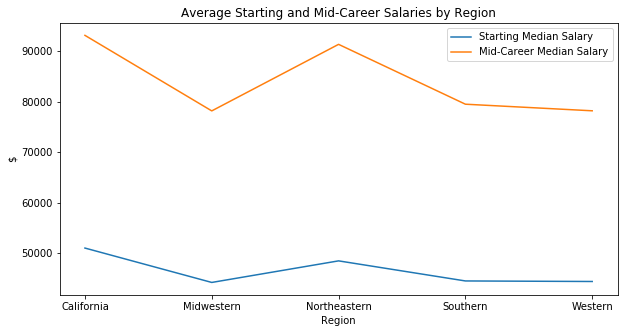

In [2]:
df_region = df.groupby('Region').mean()
plt.figure(figsize=(10,5))

plt.plot(df_region['Starting Median Salary'])
plt.plot(df_region['Mid-Career Median Salary'])
plt.title('Average Starting and Mid-Career Salaries by Region')
plt.ylabel('$')
plt.xlabel('Region')
plt.legend(loc='upper right')
plt.show()

#### The following tables will show average starting and mid-career salaries ranked high to low by region

In [3]:
df_region['Starting Median Salary'].sort_values(ascending = False)

Region
California      51032.142857
Northeastern    48496.000000
Southern        44521.518987
Western         44414.285714
Midwestern      44225.352113
Name: Starting Median Salary, dtype: float64

In [4]:
df_region['Mid-Career Median Salary'].sort_values(ascending = False)

Region
California      93132.142857
Northeastern    91352.000000
Southern        79505.063291
Western         78200.000000
Midwestern      78180.281690
Name: Mid-Career Median Salary, dtype: float64

Findings: Students graduating from California colleges have the highest average starting salary compared to those who graduate in other regions of the United States at 51K. Schools in the Northeastern region come in second place with an average starting salary of 48K. Students graduating from the Midwestern region have the lowest average starting salary at 44K. Average mid-career salaries are ranked in similar fashion with California schools ranked at the top and Midwestern schools ranked at the bottom. Thus, this data suggests that students that graduate from California schools, on average, will make 15% more in starting salary and 19% more mid-career than students that graduate from Midwestern schools. 

## Correlation between Starting Salaries and Mid-Career Salaries 
### Is there a positive correlation between starting median salaries and mid-career median salaries?

The following code and visuals will show how the starting and mid-career salaries look by region. Is there a positive linear trend for all regions? Are there any anamolies to call out?

#### This scatter plot shows starting and mid-career median salaries for all schools

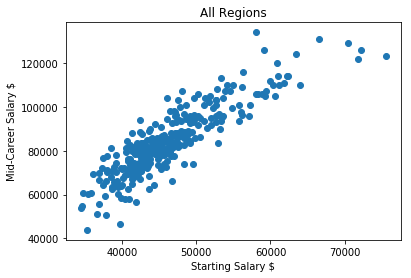

In [5]:
plt.scatter(x = df['Starting Median Salary'], y = df['Mid-Career Median Salary'])
plt.title('All Regions')
plt.xlabel('Starting Salary $')
plt.ylabel('Mid-Career Salary $')
plt.show()

#### The following scatterplots are broken out by region

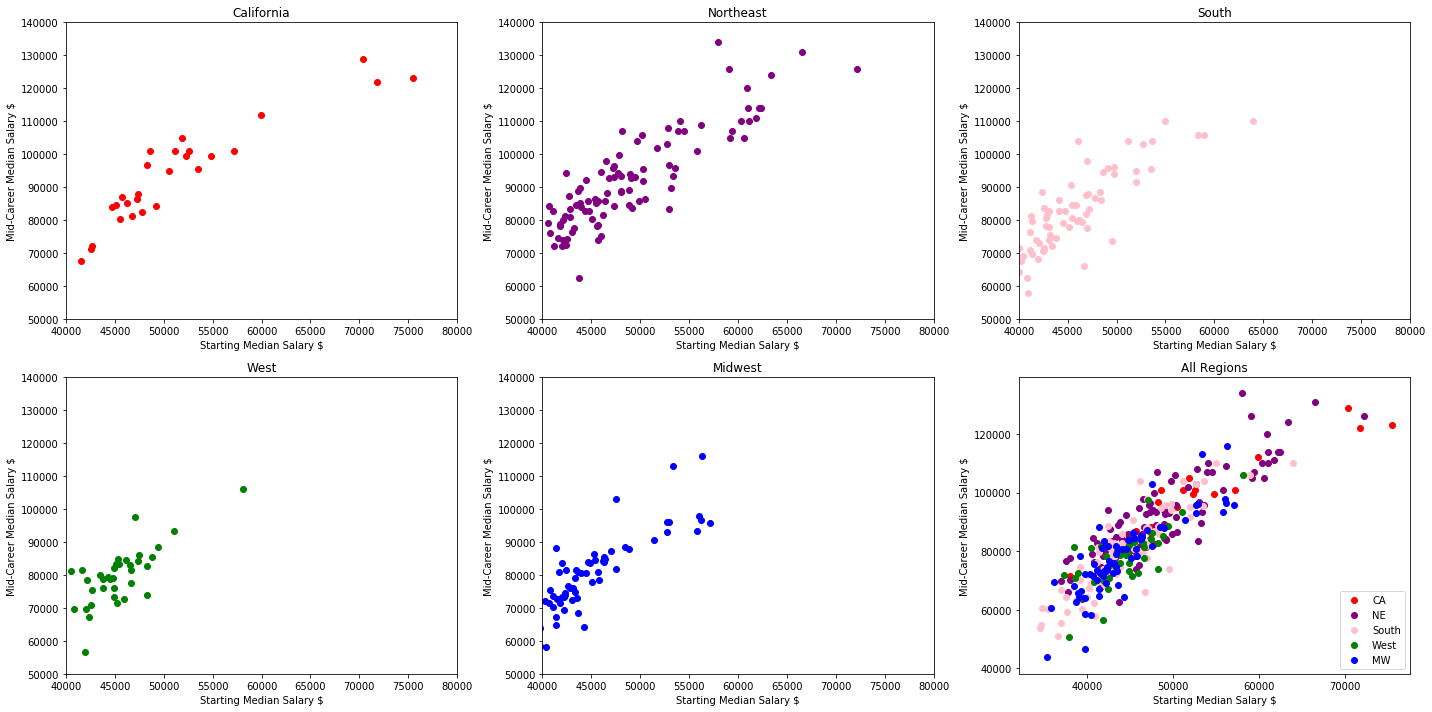

In [6]:
df_CA = df.loc[lambda df: df['Region'] == 'California', :]
df_NE = df.loc[lambda df: df['Region'] == 'Northeastern', :]
df_South = df.loc[lambda df: df['Region'] == 'Southern', :]
df_West = df.loc[lambda df: df['Region'] == 'Western', :]
df_MW = df.loc[lambda df: df['Region'] == 'Midwestern', :]

plt.figure(figsize = (20,10))

plt.subplot (2,3,1)
plt.scatter(x = df_CA['Starting Median Salary'], y = df_CA['Mid-Career Median Salary'], color='red')
plt.ylim((50000, 140000))
plt.xlim((40000, 80000))
plt.title('California')
plt.xlabel('Starting Median Salary $')
plt.ylabel('Mid-Career Median Salary $')

plt.subplot (2,3,2)
plt.scatter(x = df_NE['Starting Median Salary'], y = df_NE['Mid-Career Median Salary'], color = 'purple')
plt.ylim((50000, 140000))
plt.xlim((40000, 80000))
plt.title('Northeast')
plt.xlabel('Starting Median Salary $')
plt.ylabel('Mid-Career Median Salary $')

plt.subplot (2,3,3)
plt.scatter(x = df_South['Starting Median Salary'], y = df_South['Mid-Career Median Salary'], color = 'pink')
plt.ylim((50000, 140000))
plt.xlim((40000, 80000))
plt.title('South')
plt.xlabel('Starting Median Salary $')
plt.ylabel('Mid-Career Median Salary $')

plt.subplot (2,3,4)
plt.scatter(x = df_West['Starting Median Salary'], y = df_West['Mid-Career Median Salary'], color = 'green')
plt.ylim((50000, 140000))
plt.xlim((40000, 80000))
plt.title('West')
plt.xlabel('Starting Median Salary $')
plt.ylabel('Mid-Career Median Salary $')

plt.subplot (2,3,5)
plt.scatter(x = df_MW['Starting Median Salary'], y = df_MW['Mid-Career Median Salary'], color = 'blue')
plt.ylim((50000, 140000))
plt.xlim((40000, 80000))
plt.title('Midwest')
plt.xlabel('Starting Median Salary $')
plt.ylabel('Mid-Career Median Salary $')

plt.subplot(2,3,6)
plt.scatter(x = df_CA['Starting Median Salary'], y = df_CA['Mid-Career Median Salary'], color='red', label ='CA')
plt.scatter(x = df_NE['Starting Median Salary'], y = df_NE['Mid-Career Median Salary'], color = 'purple', label = 'NE')
plt.scatter(x = df_South['Starting Median Salary'], y = df_South['Mid-Career Median Salary'], color = 'pink', label = 'South')
plt.scatter(x = df_West['Starting Median Salary'], y = df_West['Mid-Career Median Salary'], color = 'green', label = 'West')
plt.scatter(x = df_MW['Starting Median Salary'], y = df_MW['Mid-Career Median Salary'], color = 'blue', label = 'MW')
plt.title('All Regions')
plt.xlabel('Starting Median Salary $')
plt.ylabel('Mid-Career Median Salary $')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

#### The output of this line of code will show us what school has the highest mid-career median salary

In [7]:
df.groupby('School Name').max().sort_values(by = ['Mid-Career Median Salary'], ascending = False).head(n=1)

,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
School Name,,,,,,,
Dartmouth College,Northeastern,58000,134000,"$63,100.00","$90,200.00","$234,000.00","$321,000.00"


#### This table shows what the mid career salary is for all schools with starting salaries above 60K

In [8]:
df65 = df.loc[lambda df: df['Starting Median Salary'] >=60000, :]
df65['Mid-Career Median Salary'].sort_values(ascending =False)

221    131000
0      129000
222    126000
224    124000
1      123000
2      122000
225    120000
228    114000
227    114000
226    114000
229    111000
231    110000
230    110000
141    110000
240    105000
Name: Mid-Career Median Salary, dtype: int64

Findings: Overall, we see a linear trend between starting and mid-career salaries. Typically, higher starting salaries mean higher mid-career salaries. We see a large cluster where starting salaries are between 40K - 50K and mid level salaries approximately 80K. We aren't seeing too many starting salaries above 60K but for those that are above 60K, the mid-career salaries are above 100K. 

We do see an interesting data point. The highest mid-career median salary belongs to a school in which the starting salary is less than 60K. With this, we can disprove that the school with the highest starting median salary will also be the school with the highest mid-career median salary. This may prove useful to a student looking at this data who puts more weight into what their salary will look like mid-career. We find that the school with the highest mid-career median salary is Dartmouth College in the Northeastern region. 

## Mid-Career Salary Distribution by Region
### Are the distributions of mid-career salaries the same for all regions?

The following code and visuals will show the distribution, mean, and standard deviation of mid-career salaries by region. Are the distributions all normal? 

#### The following histograms will show the distribution of mid-career salaries by region

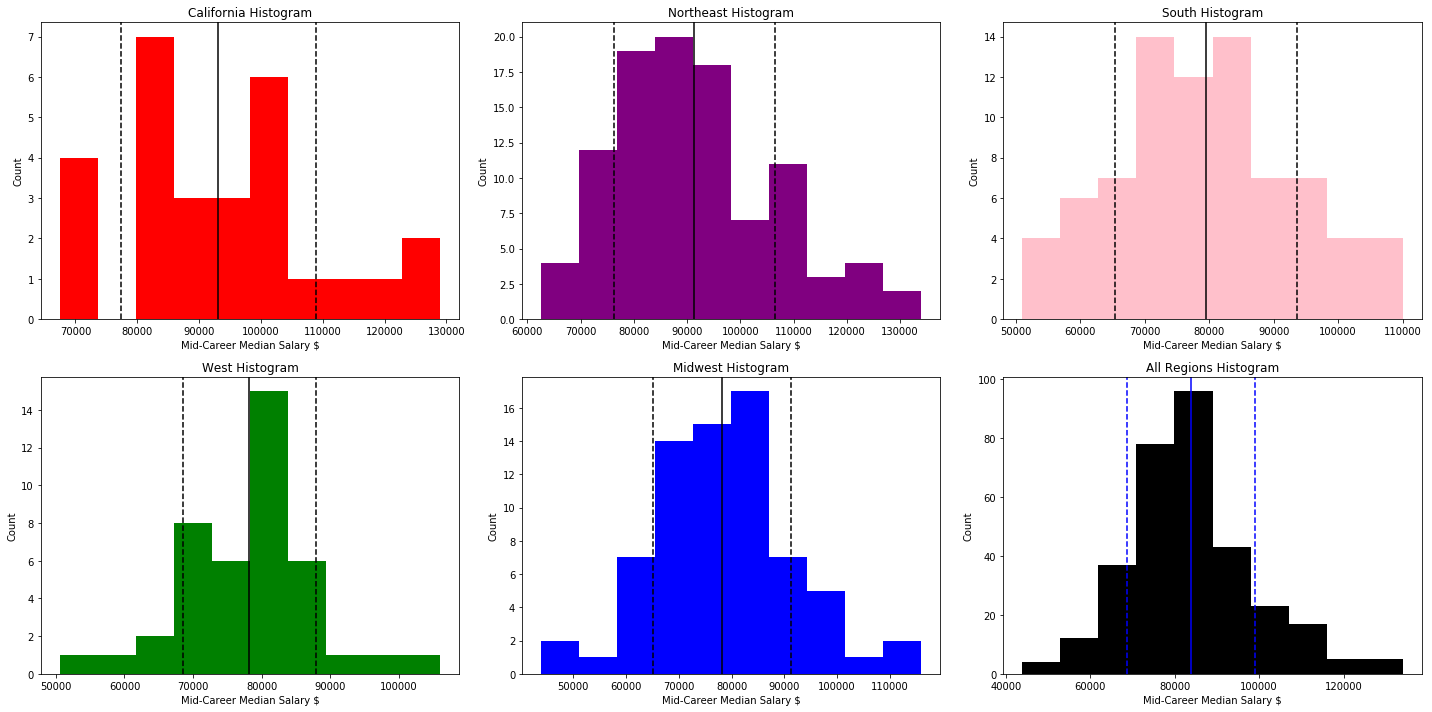

In [9]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
plt.hist(df_CA['Mid-Career Median Salary'], color = 'red')
plt.axvline(df_CA['Mid-Career Median Salary'].mean(), color = 'black', linestyle='solid')
plt.axvline(df_CA['Mid-Career Median Salary'].mean() + df_CA['Mid-Career Median Salary'].std(), color = 'black', linestyle='dashed')
plt.axvline(df_CA['Mid-Career Median Salary'].mean() - df_CA['Mid-Career Median Salary'].std(), color = 'black', linestyle='dashed')
plt.title('California Histogram')
plt.ylabel('Count')
plt.xlabel('Mid-Career Median Salary $')

plt.subplot(2, 3, 2)
plt.hist(df_NE['Mid-Career Median Salary'], color = 'purple')
plt.axvline(df_NE['Mid-Career Median Salary'].mean(), color = 'black', linestyle='solid')
plt.axvline(df_NE['Mid-Career Median Salary'].mean() + df_NE['Mid-Career Median Salary'].std(), color = 'black', linestyle='dashed')
plt.axvline(df_NE['Mid-Career Median Salary'].mean() - df_NE['Mid-Career Median Salary'].std(), color = 'black', linestyle='dashed')
plt.title('Northeast Histogram')
plt.ylabel('Count')
plt.xlabel('Mid-Career Median Salary $')

plt.subplot(2, 3, 3)
plt.hist(df_South['Mid-Career Median Salary'], color = 'pink')
plt.axvline(df_South['Mid-Career Median Salary'].mean(), color = 'black', linestyle='solid')
plt.axvline(df_South['Mid-Career Median Salary'].mean() + df_South['Mid-Career Median Salary'].std(), color = 'black', linestyle='dashed')
plt.axvline(df_South['Mid-Career Median Salary'].mean() - df_South['Mid-Career Median Salary'].std(), color = 'black', linestyle='dashed')
plt.title('South Histogram')
plt.ylabel('Count')
plt.xlabel('Mid-Career Median Salary $')

plt.subplot(2, 3, 4)
plt.hist(df_West['Mid-Career Median Salary'], color = 'green')
plt.axvline(df_West['Mid-Career Median Salary'].mean(), color = 'black', linestyle='solid')
plt.axvline(df_West['Mid-Career Median Salary'].mean() + df_West['Mid-Career Median Salary'].std(), color = 'black', linestyle='dashed')
plt.axvline(df_West['Mid-Career Median Salary'].mean() - df_West['Mid-Career Median Salary'].std(), color = 'black', linestyle='dashed')
plt.title('West Histogram')
plt.ylabel('Count')
plt.xlabel('Mid-Career Median Salary $')

plt.subplot(2, 3, 5)
plt.hist(df_MW['Mid-Career Median Salary'], color = 'blue')
plt.axvline(df_MW['Mid-Career Median Salary'].mean(), color = 'black', linestyle='solid')
plt.axvline(df_MW['Mid-Career Median Salary'].mean() + df_MW['Mid-Career Median Salary'].std(), color = 'black', linestyle='dashed')
plt.axvline(df_MW['Mid-Career Median Salary'].mean() - df_MW['Mid-Career Median Salary'].std(), color = 'black', linestyle='dashed')
plt.title('Midwest Histogram')
plt.ylabel('Count')
plt.xlabel('Mid-Career Median Salary $')

plt.subplot(2, 3, 6)
plt.hist(df['Mid-Career Median Salary'], color = 'black')
plt.axvline(df['Mid-Career Median Salary'].mean(), color = 'blue', linestyle='solid')
plt.axvline(df['Mid-Career Median Salary'].mean() + df['Mid-Career Median Salary'].std(), color = 'blue', linestyle='dashed')
plt.axvline(df['Mid-Career Median Salary'].mean() - df['Mid-Career Median Salary'].std(), color = 'blue', linestyle='dashed')
plt.title('All Regions Histogram')
plt.ylabel('Count')
plt.xlabel('Mid-Career Median Salary $')

plt.tight_layout()
plt.show()

#### This code will show how many schools are included in each region

In [10]:
df_count = df.groupby('Region').count()
df_count['School Name'].sort_values(ascending =False)

Region
Northeastern    100
Southern         79
Midwestern       71
Western          42
California       28
Name: School Name, dtype: int64

Findings: The 'All Regions Histogram' shows a normal distribution. Interesting to see the distribution for the California region. Recall in the first visual that California had the highest average starting and mid-career median salaries among all regions. The Northeast region has a much more normal distribution. 

It's likely that the distribution for California doesn't seem normal because there are only 28 schools in the sample, as opposed to 100 in the Northeast region. 

## Future Research Proposal

This data is very enlightening but as stated at the start, somewhat rudimentary. It would be interesting to overlap this data with the overall cost of tuition students pay at these schools. California schools have the highest starting and mid-career salaries but is the cost of tuition also higher than any other region? If a student graduates from Dartmouth college, they know they graduated from a school with the highest median mid-career salary. Does this benefit change if it costs the most to go to this school? I would expect schools with higher salaries to cost more but it would be insightful to see how the data looks. 

Also, a limitation of this data is it doesn't specify where the salaries are collected from. For example, does a graduate of a school in the Midwestern region stay in the Midwestern region? It would be helpful to collect some datapoints on the starting and mid-career salaries for the schools if the student stayed in region or not. Yes, California schools have a higher mid-career salary but are most of those graduates living in the Eastern region now? Would the data looked the same if all career salaries were collected just in one region?

Last, future research could involve collecting this data over time and adjusting for inflation. Would we see greater parity over the course of 5 or 10 years or would all regions rank the same in terms of starting and mid-career salaries? 